In [58]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

In [59]:
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']

collection_trend_search=db['data_trend_search']
data_trend_search = collection_trend_search.find()
df_trend_search = pd.DataFrame(data_trend_search)

### 데이터 전처리

In [60]:
df_trend_search

,_id,region,std_year_month,std_year,std_month,tour_trend,num_mention
0,65e92ddfbb908e26c804393d,강원,202007,2020,7,레포츠,58868
1,65e92ddfbb908e26c804393e,강원,202008,2020,8,레포츠,53624
2,65e92ddfbb908e26c804393f,강원,202006,2020,6,레포츠,49214
3,65e92ddfbb908e26c8043940,강원,202010,2020,10,레포츠,47223
4,65e92ddfbb908e26c8043941,강원,202007,2020,7,휴식/힐링,40740
...,...,...,...,...,...,...,...
4075,65e92de0bb908e26c8044928,충북,202301,2023,1,체험,868
4076,65e92de0bb908e26c8044929,충북,202302,2023,2,미식,843
4077,65e92de0bb908e26c804492a,충북,202312,2023,12,미식,832
4078,65e92de0bb908e26c804492b,충북,202311,2023,11,미식,797


In [61]:
df_trend_search.isnull().sum() # 데이터 결측치 x

_id               0
region            0
std_year_month    0
std_year          0
std_month         0
tour_trend        0
num_mention       0
dtype: int64

In [62]:
df_trend_search["region"].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

### 데이터 분석

#### 강원
-강원 지역은 8월에 가장 언급량 수가 많음

In [122]:
first = df_trend_search.query("region=='강원'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='강원'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='강원'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='강원'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='강원'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='강원'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='강원'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='강원'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='강원'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='강원'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='강원'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='강원'").query("std_month==12")["num_mention"].sum()/4

list_gangwon = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_gangwon = pd.Series(list_gangwon)
df_gangwon = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_gangwon})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

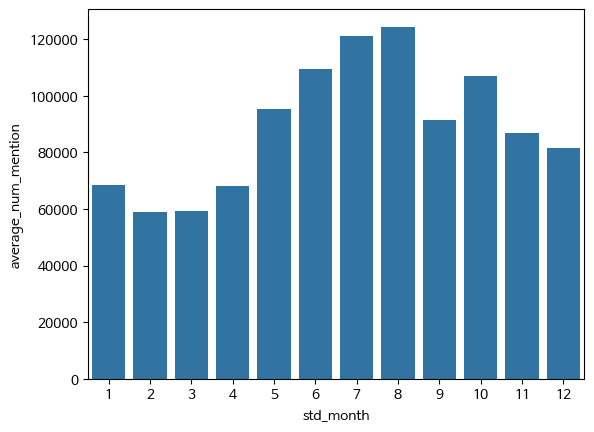

In [123]:
# 강원 연평균 월별 언급량 수
sns.barplot(data = df_gangwon.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 경기
-경기 지역은 10월에 가장 언급량 수가 많음

In [124]:
first = df_trend_search.query("region=='경기'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='경기'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='경기'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='경기'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='경기'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='경기'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='경기'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='경기'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='경기'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='경기'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='경기'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='경기'").query("std_month==12")["num_mention"].sum()/4

list_gyeongi = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_gyeongi = pd.Series(list_gyeongi)
df_gyeongi = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_gyeongi})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

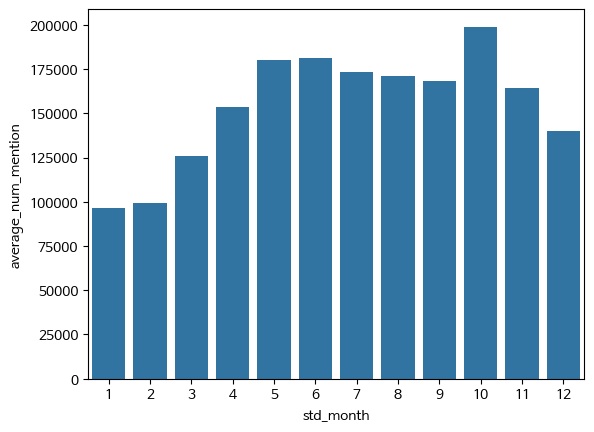

In [125]:
# 경기 연평균 월별 언급량 수
sns.barplot(data = df_gyeongi.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 경남
-경남 지역은 10월에 가장 언급량 수가 많음

In [126]:
first = df_trend_search.query("region=='경남'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='경남'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='경남'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='경남'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='경남'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='경남'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='경남'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='경남'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='경남'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='경남'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='경남'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='경남'").query("std_month==12")["num_mention"].sum()/4

list_gyeongnam = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_gyeongnam = pd.Series(list_gyeongnam)
df_gyeongnam = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_gyeongnam})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

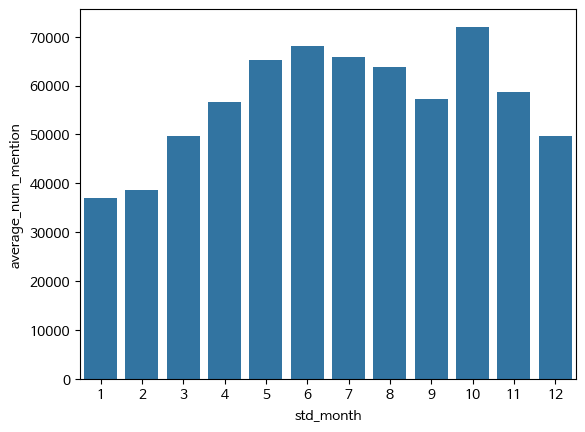

In [127]:
# 경남 연평균 월별 언급량 수
sns.barplot(data = df_gyeongnam.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 경북
-경북 지역은 8월에 가장 언급량 수가 많음

In [128]:
first = df_trend_search.query("region=='경북'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='경북'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='경북'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='경북'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='경북'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='경북'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='경북'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='경북'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='경북'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='경북'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='경북'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='경북'").query("std_month==12")["num_mention"].sum()/4

list_gyeongbuk = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_gyeongbuk = pd.Series(list_gyeongbuk)
df_gyeongbuk = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_gyeongbuk})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

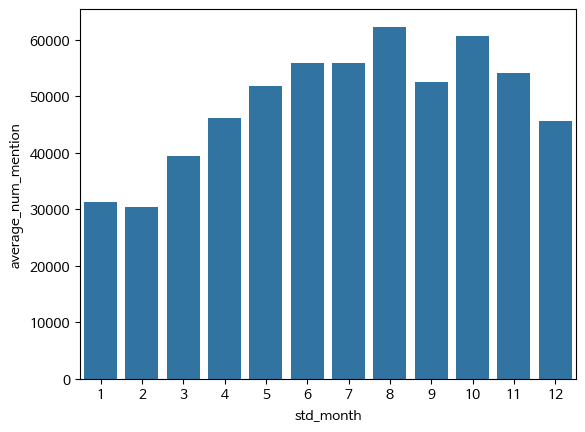

In [129]:
# 경북 연평균 월별 언급량 수
sns.barplot(data = df_gyeongbuk.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 광주
-광주 지역은 10월에 가장 언급량 수가 많음

In [131]:
first = df_trend_search.query("region=='광주'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='광주'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='광주'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='광주'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='광주'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='광주'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='광주'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='광주'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='광주'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='광주'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='광주'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='광주'").query("std_month==12")["num_mention"].sum()/4

list_gwangju = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_gwangju = pd.Series(list_gwangju)
df_gwangju = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_gwangju})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

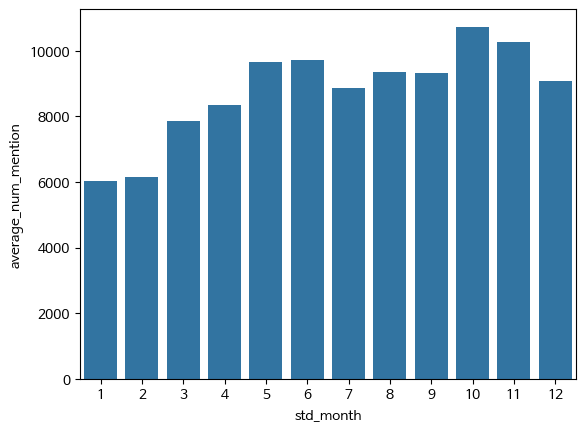

In [132]:
# 광주 연평균 월별 언급량 수
sns.barplot(data = df_gwangju.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 대구
-대구 지역은 10월에 가장 언급량 수가 많음

In [133]:
first = df_trend_search.query("region=='대구'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='대구'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='대구'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='대구'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='대구'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='대구'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='대구'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='대구'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='대구'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='대구'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='대구'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='대구'").query("std_month==12")["num_mention"].sum()/4

list_daegu = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_daegu = pd.Series(list_daegu)
df_daegu = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_daegu})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

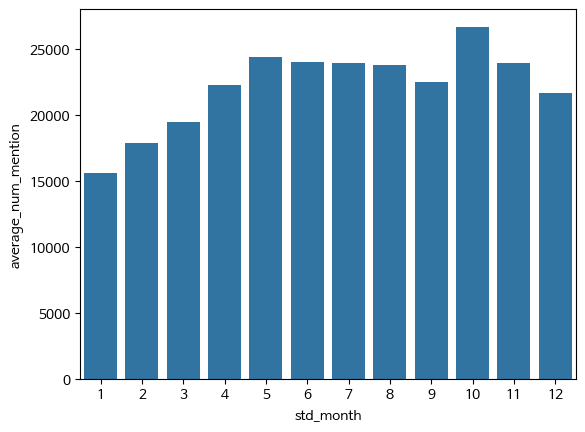

In [134]:
# 대구 연평균 월별 언급량 수
sns.barplot(data = df_daegu.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 대전
-대전 지역은 10월에 가장 언급량 수가 많음

In [135]:
first = df_trend_search.query("region=='대전'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='대전'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='대전'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='대전'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='대전'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='대전'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='대전'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='대전'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='대전'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='대전'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='대전'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='대전'").query("std_month==12")["num_mention"].sum()/4

list_daejeon = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_daejeon = pd.Series(list_daejeon)
df_daejeon = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_daejeon})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

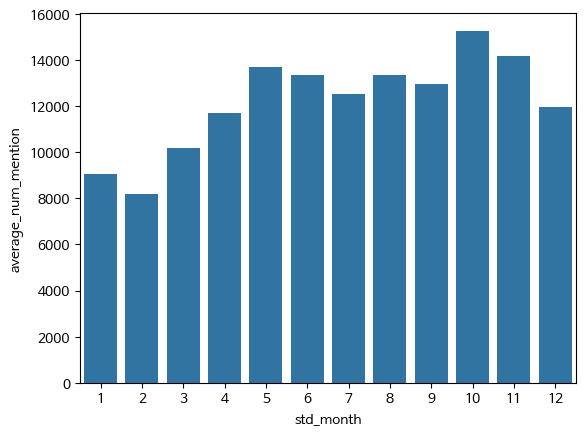

In [136]:
# 대전 연평균 월별 언급량 수
sns.barplot(data = df_daejeon.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 부산
-부산 지역은 8월에 가장 언급량 수가 많음

In [137]:
first = df_trend_search.query("region=='부산'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='부산'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='부산'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='부산'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='부산'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='부산'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='부산'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='부산'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='부산'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='부산'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='부산'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='부산'").query("std_month==12")["num_mention"].sum()/4

list_busan = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_busan = pd.Series(list_busan)
df_busan = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_busan})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

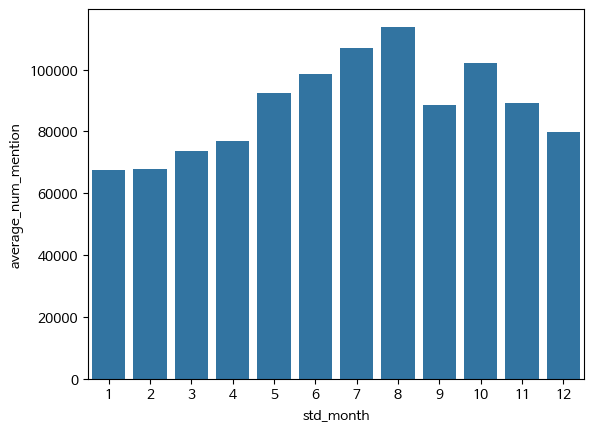

In [138]:
# 부산 연평균 월별 언급량 수
sns.barplot(data = df_busan.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 서울
-서울 지역은 10월에 가장 언급량 수가 많음

In [139]:
first = df_trend_search.query("region=='서울'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='서울'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='서울'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='서울'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='서울'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='서울'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='서울'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='서울'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='서울'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='서울'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='서울'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='서울'").query("std_month==12")["num_mention"].sum()/4

list_seoul = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_seoul = pd.Series(list_seoul)
df_seoul = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_seoul})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

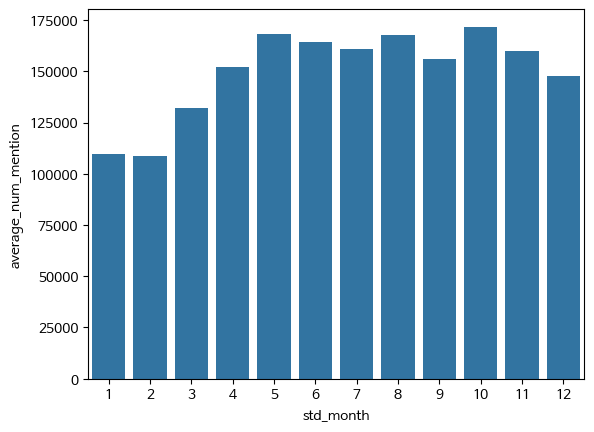

In [140]:
# 서울 연평균 월별 언급량 수
sns.barplot(data = df_seoul.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 세종
-세종 지역은 10월에 가장 언급량 수가 많음

In [141]:
first = df_trend_search.query("region=='세종'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='세종'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='세종'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='세종'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='세종'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='세종'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='세종'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='세종'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='세종'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='세종'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='세종'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='세종'").query("std_month==12")["num_mention"].sum()/4

list_sejong = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_sejong = pd.Series(list_sejong)
df_sejong = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_sejong})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

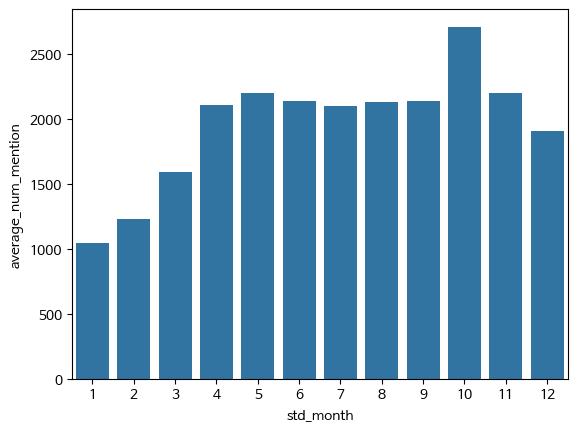

In [142]:
# 세종 연평균 월별 언급량 수
sns.barplot(data = df_sejong.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 울산
-울산 지역은 10월에 가장 언급량 수가 많음

In [144]:
first = df_trend_search.query("region=='울산'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='울산'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='울산'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='울산'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='울산'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='울산'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='울산'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='울산'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='울산'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='울산'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='울산'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='울산'").query("std_month==12")["num_mention"].sum()/4

list_ulsan = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_ulsan = pd.Series(list_ulsan)
df_ulsan = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_ulsan})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

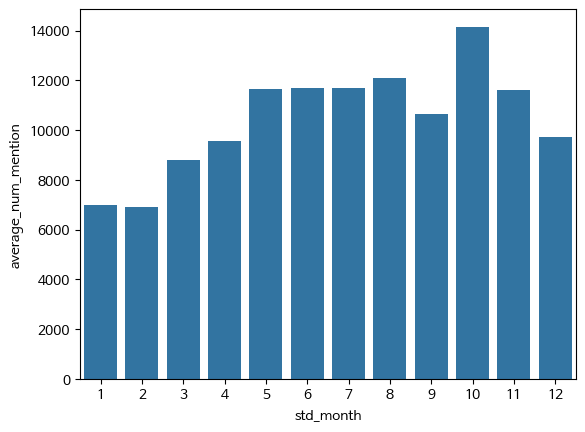

In [151]:
# 울산 연평균 월별 언급량 수
sns.barplot(data = df_ulsan.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 인천
-인천 지역은 10월에 가장 언급량 수가 많음

In [146]:
first = df_trend_search.query("region=='인천'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='인천'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='인천'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='인천'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='인천'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='인천'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='인천'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='인천'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='인천'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='인천'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='인천'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='인천'").query("std_month==12")["num_mention"].sum()/4

list_incheon = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_incheon = pd.Series(list_incheon)
df_incheon = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_incheon})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

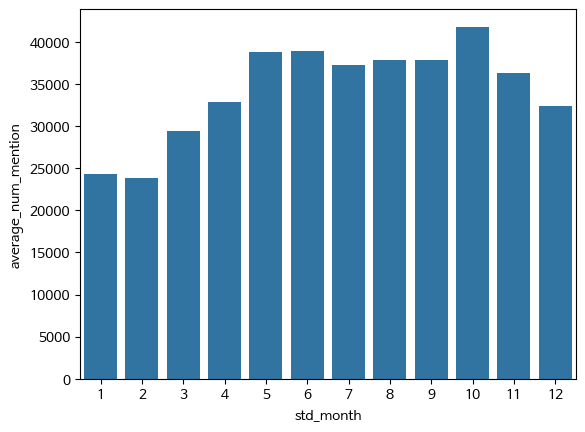

In [150]:
# 인천 연평균 월별 언급량 수
sns.barplot(data = df_incheon.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 전남
-전남 지역은 10월에 가장 언급량 수가 많음

In [163]:
first = df_trend_search.query("region=='전남'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='전남'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='전남'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='전남'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='전남'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='전남'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='전남'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='전남'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='전남'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='전남'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='전남'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='전남'").query("std_month==12")["num_mention"].sum()/4

list_jeonnam = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_jeonnam = pd.Series(list_jeonnam)
df_jeonnam = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_jeonnam})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

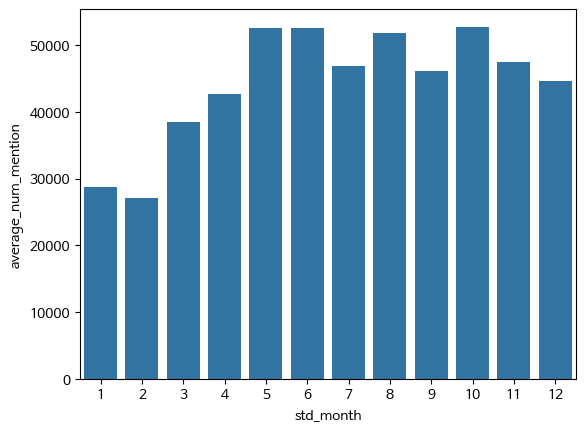

In [149]:
# 전남 연평균 월별 언급량 수
sns.barplot(data = df_jeonnam.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 전북
-전북 지역은 10월에 가장 언급량 수가 많음

In [164]:
first = df_trend_search.query("region=='전북'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='전북'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='전북'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='전북'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='전북'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='전북'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='전북'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='전북'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='전북'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='전북'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='전북'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='전북'").query("std_month==12")["num_mention"].sum()/4

list_jeonbuk = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_jeonbuk = pd.Series(list_jeonbuk)
df_jeonbuk = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_jeonbuk})
df_jeonbuk['average_num_mention'].sort_values(ascending=False)

9     33541.00
7     33379.50
10    30165.50
6     29994.00
5     29664.00
4     29438.00
8     27531.75
11    24802.00
3     24232.25
2     19877.75
0     17782.50
1     16696.25
Name: average_num_mention, dtype: float64

<Axes: xlabel='std_month', ylabel='average_num_mention'>

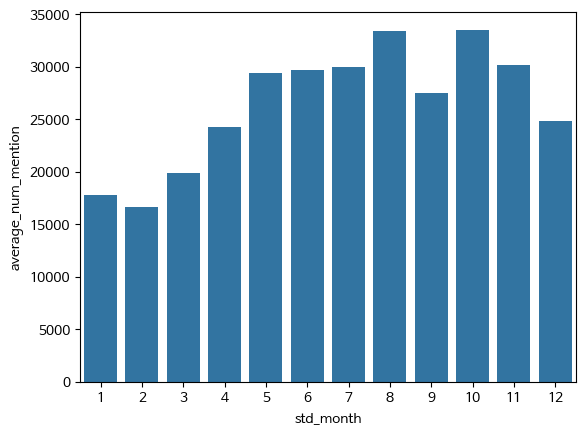

In [153]:
# 전남 연평균 월별 언급량 수
sns.barplot(data = df_jeonbuk.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 제주
-제주 지역은 7월에 가장 언급량 수가 많음

In [154]:
first = df_trend_search.query("region=='제주'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='제주'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='제주'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='제주'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='제주'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='제주'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='제주'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='제주'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='제주'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='제주'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='제주'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='제주'").query("std_month==12")["num_mention"].sum()/4

list_jeju = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_jeju = pd.Series(list_jeju)
df_jeju = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_jeju})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

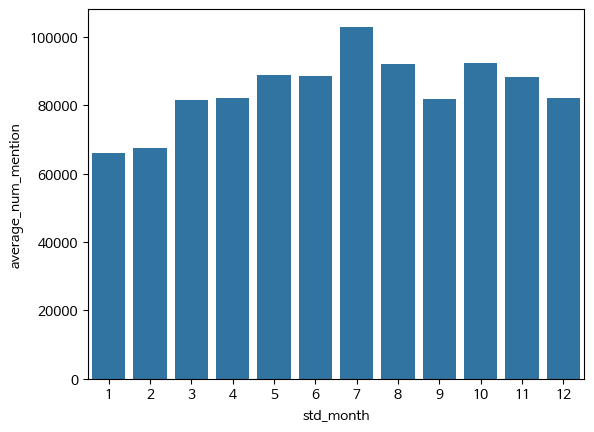

In [155]:
# 제주 연평균 월별 언급량 수
sns.barplot(data = df_jeju.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 충남
-충남 지역은 10월에 가장 언급량 수가 많음

In [156]:
first = df_trend_search.query("region=='충남'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='충남'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='충남'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='충남'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='충남'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='충남'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='충남'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='충남'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='충남'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='충남'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='충남'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='충남'").query("std_month==12")["num_mention"].sum()/4

list_chungnam = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_chungnam = pd.Series(list_chungnam)
df_chungnam = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_chungnam})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

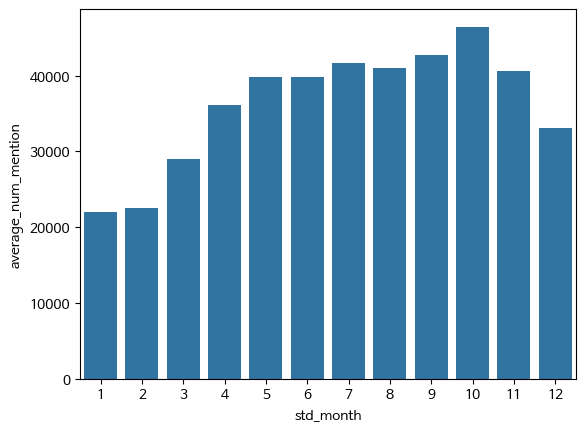

In [157]:
# 충남 연평균 월별 언급량 수
sns.barplot(data = df_chungnam.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")

#### 충북
-충북 지역은 10월에 가장 언급량 수가 많음

In [158]:
first = df_trend_search.query("region=='충북'").query("std_month==1")["num_mention"].sum()/4
second = df_trend_search.query("region=='충북'").query("std_month==2")["num_mention"].sum()/4
third = df_trend_search.query("region=='충북'").query("std_month==3")["num_mention"].sum()/4
fourth=df_trend_search.query("region=='충북'").query("std_month==4")["num_mention"].sum()/4
fifth=df_trend_search.query("region=='충북'").query("std_month==5")["num_mention"].sum()/4
sixth=df_trend_search.query("region=='충북'").query("std_month==6")["num_mention"].sum()/4
seventh=df_trend_search.query("region=='충북'").query("std_month==7")["num_mention"].sum()/4
eighth=df_trend_search.query("region=='충북'").query("std_month==8")["num_mention"].sum()/4
ninth=df_trend_search.query("region=='충북'").query("std_month==9")["num_mention"].sum()/4
tenth=df_trend_search.query("region=='충북'").query("std_month==10")["num_mention"].sum()/4
eleventh=df_trend_search.query("region=='충북'").query("std_month==11")["num_mention"].sum()/4
twelfth=df_trend_search.query("region=='충북'").query("std_month==12")["num_mention"].sum()/4

list_chungbuk = [first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth]
series_list_chungbuk = pd.Series(list_chungbuk)
df_chungbuk = pd.DataFrame({'std_month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'average_num_mention': series_list_chungbuk})

<Axes: xlabel='std_month', ylabel='average_num_mention'>

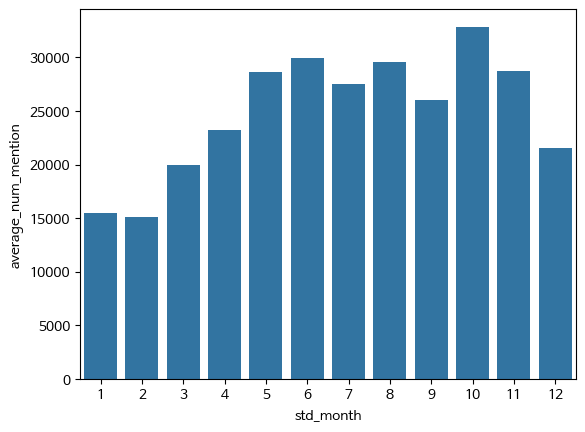

In [159]:
# 충남 연평균 월별 언급량 수
sns.barplot(data = df_chungbuk.sort_values(by = "average_num_mention", ascending = False), x="std_month", y="average_num_mention")